In [37]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import AlignIO, Phylo
import matplotlib.pyplot as plt

from Bio.Align.Applications import ClustalwCommandline

In [16]:
OUTPUT_PATH = './translated_records.fasta'

2. Load `.fasta` file

In [3]:
records = list(SeqIO.parse("ls_orchid.fasta", "fasta"))
print(records[0].id)  # first record
print(records[-1].id)  # last record

gi|2765658|emb|Z78533.1|CIZ78533
gi|2765564|emb|Z78439.1|PBZ78439


3. Translate to protein

In [19]:
print(records[0].description)
print(records[0].id)

gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
gi|2765658|emb|Z78533.1|CIZ78533


In [22]:
translated_records = []

for record in records:
    translated_seq = record.seq.translate(to_stop=True)
    translated_records.append(SeqRecord(translated_seq, id=record.id, description=record.description))

SeqIO.write(translated_records, OUTPUT_PATH, "fasta")

94

4. Use ClustalW algorithm to run multiple sequence alignment

In [25]:
clustalw_cline = ClustalwCommandline("clustalw2", infile=OUTPUT_PATH)
print(clustalw_cline)

clustalw2 -infile=./translated_records.fasta


In [26]:
!clustalw2 -infile=./translated_records.fasta




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: gi|2765658|emb|Z78533.1|CIZ78533   125 aa
Sequence 2: gi|2765657|emb|Z78532.1|CCZ78532    20 aa
Sequence 3: gi|2765656|emb|Z78531.1|CFZ78531    40 aa
Sequence 4: gi|2765655|emb|Z78530.1|CMZ78530    40 aa
Sequence 5: gi|2765654|emb|Z78529.1|CLZ78529    34 aa
Sequence 6: gi|2765652|emb|Z78527.1|CYZ78527    17 aa
Sequence 7: gi|2765651|emb|Z78526.1|CGZ78526    17 aa
Sequence 8: gi|2765650|emb|Z78525.1|CAZ78525     1 aa
Sequence 9: gi|2765649|emb|Z78524.1|CFZ78524    16 aa
Sequence 10: gi|2765648|emb|Z78523.1|CHZ78523    20 aa
Sequence 11: gi|2765647|emb|Z78522.1|CMZ78522    20 aa
Sequence 12: gi|2765646|emb|Z78521.1|CCZ78521    12 aa
Sequence 13: gi|2765645|emb|Z78520.1|CSZ78520    20 aa
Sequence 14: gi|2765644|emb|Z78519.1|CPZ78519     1 aa
Sequence 15: gi|2765643|emb|Z78518.1|CRZ78518    16 aa
Sequence 16: gi|2765642|emb|Z78517.1|CFZ78517    17 aa
Sequence 17: gi|2765641|emb|Z78516.1|CPZ78516    20 aa


5. Read alignment and visualize tree

In [31]:
translated_records_align = AlignIO.read("./translated_records.aln", "clustal")
print(translated_records_align)

Alignment with 94 rows and 125 columns
---------------------------RNKDSVGEPAEGSLLRS...--- gi|2765618|emb|Z78493.1|PGZ784
--------------------------------VGEPAEGSLLRS...--- gi|2765567|emb|Z78442.1|PBZ784
---------------------------RNKVSVGEPAEGSLLRS...--- gi|2765593|emb|Z78468.1|PAZ784
---------------------------RNKVSVGEPAEGSLLRS...--- gi|2765591|emb|Z78466.1|PPZ784
---------------------------RNKVSVGEPAEGSLLRS...--- gi|2765583|emb|Z78458.1|PHZ784
---------------------------RNKVSVGEPAEGSLLRS...--- gi|2765579|emb|Z78454.1|PFZ784
---------------------------RNKVSVGEPAEGSLLRS...--- gi|2765578|emb|Z78453.1|PSZ784
---------------------------RNKVSVGEPAEGSLLRS...--- gi|2765568|emb|Z78443.1|PLZ784
---------------------------RNKVSVGEPAEGSLLRS...--- gi|2765570|emb|Z78445.1|PUZ784
---------------------------RNKVSVGEPAEGSLLRS...--- gi|2765573|emb|Z78448.1|PAZ784
---------------------------RNKVSVGEPAEGSLLRS...--- gi|2765574|emb|Z78449.1|PMZ784
---------------------------RNKVSVGEPAEGSLLRS...--- gi|27655

<Figure size 2000x1600 with 0 Axes>

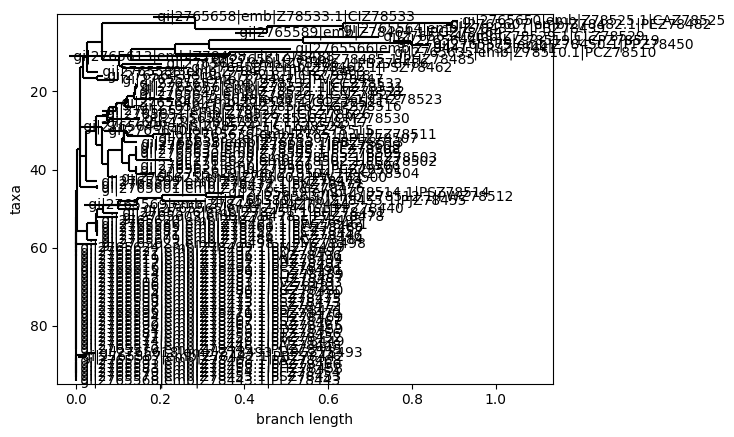

In [42]:
tree = Phylo.read("./translated_records.dnd", "newick")

plt.figure(figsize=(20, 16))
Phylo.draw(tree, do_show=False)
plt.savefig('tree.png')

In [54]:
Phylo.draw_ascii(tree)

             , gi|2765658|emb|Z78533.1|CIZ78533
             |
             |                          , gi|2765650|emb|Z78525.1|CAZ78525
    _________|               ___________|
   |         |        ______|           | gi|2765607|emb|Z78482.1|PEZ78482
   |         |       |      |
   |         |_______|      | gi|2765564|emb|Z78439.1|PBZ78439
   |                 |
   |                 | gi|2765589|emb|Z78464.1|PGZ78464
   |
   |                     _______ gi|2765654|emb|Z78529.1|CLZ78529
   |           _________|
  ,|          |         |           , gi|2765644|emb|Z78519.1|CPZ78519
  ||        __|         |___________|
  ||       |  |                     |_ gi|2765575|emb|Z78450.1|PPZ78450
  ||       |  |
  ||   ____|  |________ gi|2765566|emb|Z78441.1|PSZ78441
  ||  |    |
  ||  |    |      _______________ gi|2765635|emb|Z78510.1|PCZ78510
  || ,|    |_____|
 ,|| ||          | gi|2765613|emb|Z78488.1|PTZ78488
 ||| ||
 |||_||_______ gi|2765610|emb|Z78485.1|PHZ78485
 ||  |
 ||  |__

6. Average length

In [48]:
len(translated_records_align)

94

In [47]:
translated_records_align._records[0].seq

Seq('---------------------------RNKDSVGEPAEGSLLRSHNN-------...---')

In [51]:
str(translated_records_align._records[0].seq).replace("-", "")

'RNKDSVGEPAEGSLLRSHNN'

In [60]:
records_lengths = []
all_records = len(translated_records_align)

for record in translated_records_align._records:
    seq_len = len(str(record.seq).replace("-", ""))
    records_lengths.append(seq_len)


print(f'Average length of protein sequences: {round(sum(records_lengths)/all_records, 2)}')

Average length of protein sequences: 20.59
